#  <span style="color:#3D6AF2; text-align: center;">CLASSIFICATION TREES - ÁRBOLES DE CLASIFICACIÓN</span>

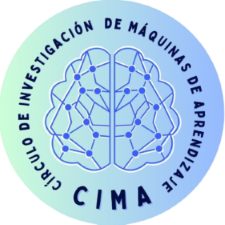

### <span style="color:#486CD9; text-align: center;">Alumno: Yudenio Bermudez Huayhua</span>

<p>
        Los <strong>árboles de clasificación</strong> son un tipo de modelo de aprendizaje supervisado que organiza los datos en una estructura jerárquica de decisiones basada en reglas.
        Utilizan criterios como el <em>índice de Gini</em> o la <em>entropía</em> para dividir iterativamente los datos en subconjuntos más homogéneos hasta que cada nodo hoja
        contenga instancias predominantemente de una misma clase. Son fáciles de interpretar y manejar tanto variables categóricas como numéricas, pero pueden sobreajustarse
        si no se podan adecuadamente. Para mejorar su rendimiento, se utilizan métodos como <strong>Random Forest</strong> o <strong>XGBoost</strong>, que combinan múltiples
        árboles para aumentar la precisión y la generalización del modelo.
    </p>

##  <span style="color:#3D6AF2; text-align: center;">Caso de estudio</span>

El Obesity Levels Dataset es un conjunto de datos de salud que recopila información sobre hábitos alimenticios, actividad física, medidas antropométricas y otros indicadores de estilo de vida, con el objetivo de clasificar los niveles de obesidad de los individuos. Contiene diversas variables, tanto demográficas como relacionadas con el comportamiento y la nutrición, que pueden influir en el diagnóstico de la obesidad. El target en este caso de estudio es una variable categórica que indica el nivel de obesidad (por ejemplo, normal, sobrepeso u obesidad), permitiendo entrenar modelos de clasificación, como Random Forest, para identificar patrones y ayudar en la detección y prevención de riesgos asociados a la obesidad.


[Datos disponibles aquí](https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels/data)

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [8]:
import os
import pandas as pd
import kagglehub

path = kagglehub.dataset_download("ankurbajaj9/obesity-levels")

print("Path to dataset files:", path)
print("Contents of the dataset directory:")
for item in os.listdir(path):
    print(item)


file_path = os.path.join(path, 'ObesityDataSet_raw_and_data_sinthetic.csv')


with open(file_path, 'r') as file:
    lines = file.readlines()


    for i in range(5):
        print(lines[i])

df = pd.read_csv(file_path)
print(df.head())


Path to dataset files: /root/.cache/kagglehub/datasets/ankurbajaj9/obesity-levels/versions/1
Contents of the dataset directory:
ObesityDataSet_raw_and_data_sinthetic.csv
ObesityDataSet_raw_and_data_sinthetic.arff
Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad

Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight

Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight

Male,23,1.8,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight

Male,27,1.8,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            ye

In [33]:
# Read file
data = df
#creating a copy
df= data.copy()
df.head()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2085.0,24.358225,6.369621,14.00,19.920629,22.851721,26.000000,61.000000
Height,2085.0,1.702461,0.092960,1.45,1.630000,1.701566,1.769328,1.975663
Weight,2085.0,86.799122,26.121955,39.00,66.000000,83.016968,108.000000,165.057269
FCVC,2085.0,2.425899,0.585248,1.00,2.000000,2.000000,3.000000,3.000000
NCP,2085.0,2.703118,0.797438,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,2085.0,2.011031,0.685309,1.00,2.000000,2.000000,2.000000,3.000000
FAF,2085.0,1.008633,0.898881,0.00,0.000000,1.000000,2.000000,3.000000
TUE,2085.0,0.669544,0.674215,0.00,0.000000,1.000000,1.000000,2.000000


In [36]:
#dropping duplicate rows
df.drop_duplicates(inplace = True)
#numerical columns
numerical_columns = [col for col in df.columns if df[col].dtype != 'O']
numerical_columns
#categorical columns
categorical_columns = [col for col in df.columns if df[col].dtype == 'O']
categorical_columns
#rounding off to integer value
df['NCP'] = round(df['NCP']).astype(int)
df['FCVC'] = round(df['FCVC']).astype(int)
df['CH2O']= round(df['CH2O']).astype(int)
df['FAF']= round(df['FAF']).astype(int)
df['TUE'] = round(df['TUE']).astype(int)
#columns with discrete values
discrete_columns = [col for col in df.columns if len(df[col].unique())<7]
discrete_columns
#continious variables
continuous_columns = [col for col in df.columns if len(df[col].unique())>10]
continuous_columns

['Age', 'Height', 'Weight']

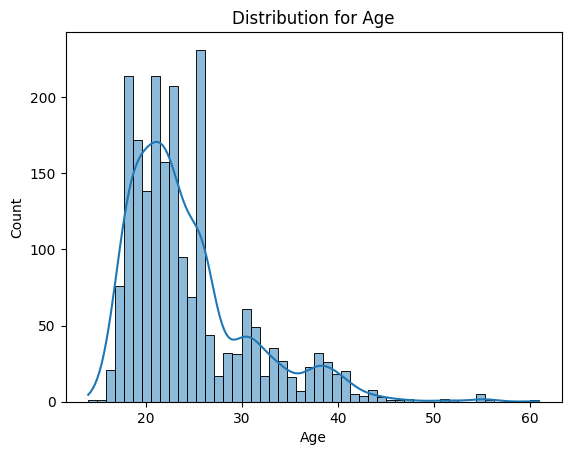

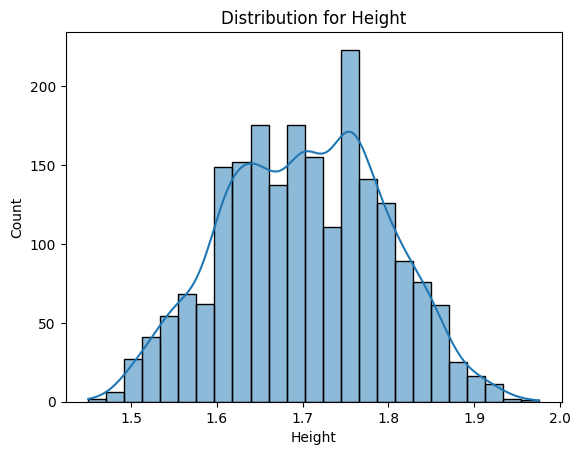

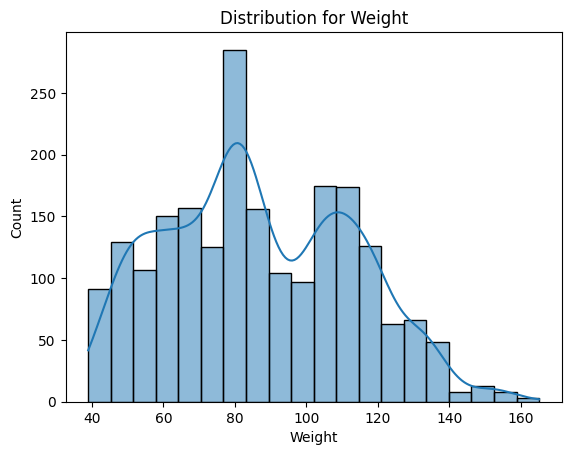

In [37]:
#checking distribution of data
for col in continuous_columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution for {col}')
    plt.show()

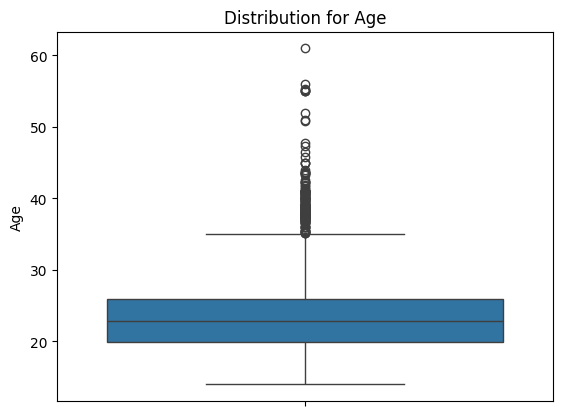

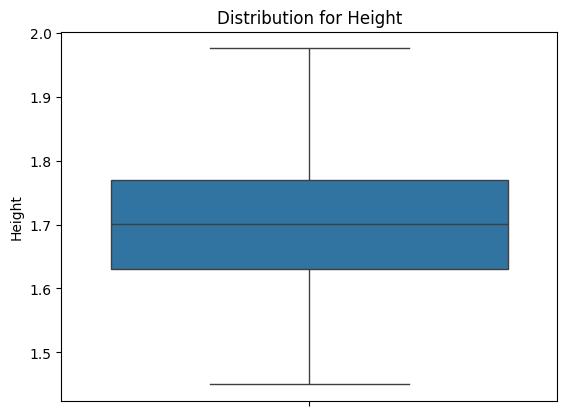

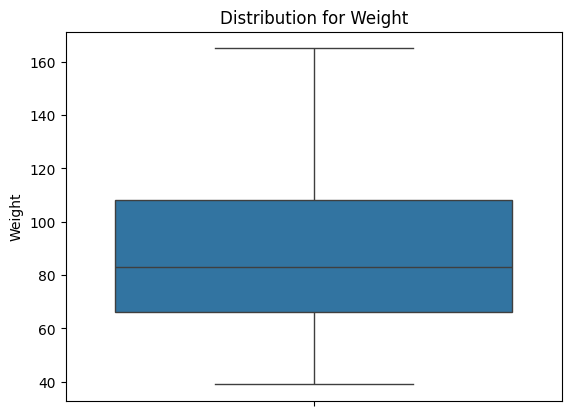

In [38]:
#checking outliers
for col in continuous_columns:
    sns.boxplot(df[col])
    plt.title(f'Distribution for {col}')
    plt.show()

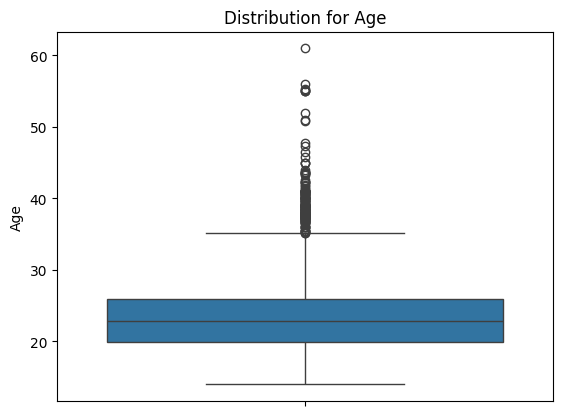

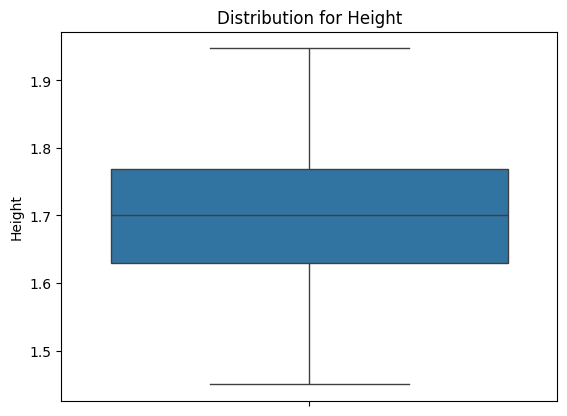

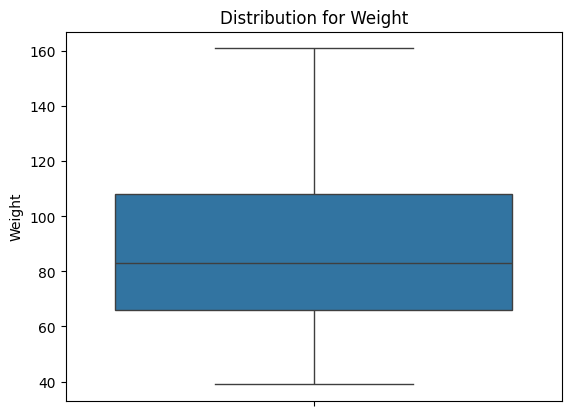

In [39]:
#treating outlier in height and weight, not from age because age has impact on metabolism and hence obesity, the relation may not follow normal distribution
df.drop(df[df['Weight'] == df['Weight'].max()].index, inplace=True)
df.drop(df[df['Height'] == df['Height'].max()].index, inplace=True)
#recheck
for col in continuous_columns:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f'Distribution for {col}')
    plt.show()
    df.head()

In [40]:
#encoding binary columns
df_prep = pd.get_dummies(df, columns=["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
df_prep.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2,3,2,0,1,Normal_Weight,True,...,False,False,False,False,True,False,False,False,True,False
1,21.0,1.52,56.0,3,3,3,3,0,Normal_Weight,True,...,True,False,False,True,False,False,False,False,True,False
2,23.0,1.80,77.0,2,3,2,2,1,Normal_Weight,False,...,False,False,True,False,False,False,False,False,True,False
3,27.0,1.80,87.0,3,3,2,2,0,Overweight_Level_I,False,...,False,False,True,False,False,False,False,False,False,True
4,22.0,1.78,89.8,2,1,2,0,0,Overweight_Level_II,False,...,False,False,False,True,False,False,False,False,True,False


In [41]:
#segeregating x and y
df_prep.drop('NObeyesdad', axis =1, inplace = True)
#replacing binary with int
df_prep = df_prep.replace({True: 1, False: 0})
df_prep.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2,3,2,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3,3,3,3,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2,3,2,2,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3,3,2,2,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2,1,2,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [42]:
#standardizing data
ss = StandardScaler()
x = ss.fit_transform(df_prep)

In [43]:
#target variable
y = df['NObeyesdad']
#train test split of data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [44]:
#choosing a model
rf = RandomForestClassifier(random_state=2020)
#model fitting
rf.fit(x_train, y_train)
#checing score
rf.score(x_test, y_test)
y_pred = rf.predict(x_test)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
#model performance
report_df

,precision,recall,f1-score,support
Insufficient_Weight,0.964286,0.931034,0.947368,87.0000
Normal_Weight,0.792079,0.869565,0.829016,92.0000
Obesity_Type_I,0.969388,0.950000,0.959596,100.0000
Obesity_Type_II,1.000000,0.988764,0.994350,89.0000
Obesity_Type_III,1.000000,1.000000,1.000000,88.0000
Overweight_Level_I,0.865854,0.845238,0.855422,84.0000
Overweight_Level_II,0.940476,0.929412,0.934911,85.0000
accuracy,0.931200,0.931200,0.931200,0.9312
macro avg,0.933155,0.930573,0.931523,625.0000
weighted avg,0.933400,0.931200,0.931952,625.0000


El modelo muestra un desempeño sobresaliente con una exactitud global del 93.12%, lo que indica que clasifica correctamente la gran mayoría de los casos. En el detalle por clases, se observa que las categorías "Obesity_Type_II" y "Obesity_Type_III" alcanzan puntuaciones casi perfectas, con precisión y f1-score cercanas a 1, lo que sugiere que el modelo identifica de manera muy efectiva estos niveles de obesidad. La clase "Insufficient_Weight" también presenta altos valores de precisión (0.96) y f1-score (0.95), mientras que "Normal_Weight" muestra una precisión algo menor (0.79) pero un recall elevado (0.87), lo que implica que el modelo logra captar la mayoría de los casos de peso normal, aunque con cierta tendencia a producir falsos positivos. En resumen, tanto el promedio macro (0.93) como el ponderado (0.93) refuerzan la consistencia del modelo en la clasificación de las diferentes categorías de obesidad.

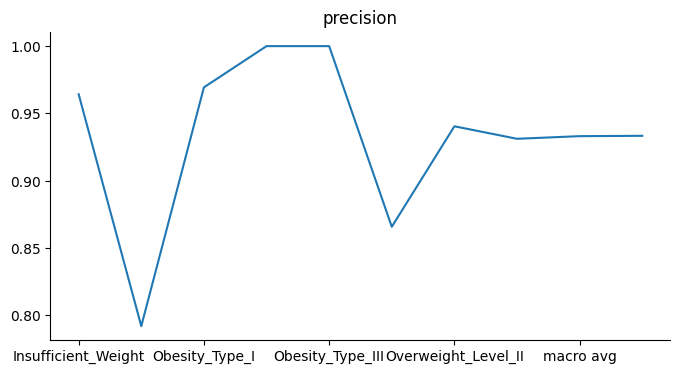

In [45]:
# @title precision

from matplotlib import pyplot as plt
report_df['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

In [30]:
#Hyper parameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2'],  # A veces 'auto' puede ser redundante
    'max_depth': [20, 40, 60],
}
#Hyper parameters grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2020),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 40, 60],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [31]:
#finding best parameter
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
best_rf.fit(x_train, y_train)
best_rf.score(x_test, y_test)

0.9361022364217252